# ROC Curve
What is ROC Curve?

ROC (Receiver Operating Characteristic) curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.


X-axis: False Positive Rate (FPR) = FP / (FP + TN)

Y-axis: True Positive Rate (TPR) = TP / (TP + FN) = Recall/Sensitivity

Each point: Represents a TPR/FPR pair at a particular threshold

Diagonal line: Random classifier (AUC = 0.5)


Confusion Matrix Fundamentals:
``` bash
                Actual
            Positive   Negative
Predicted
Positive      TP         FP
Negative      FN         TN

```
Derived Metrics:
- TPR/Sensitivity/Recall: TP / (TP + FN)

- FPR/Fall-out: FP / (FP + TN)

- Specificity: TN / (TN + FP) = 1 - FPR

How ROC Curve is Generated
``` bash
Step-by-step Process:
Train a binary classifier that outputs probabilities

Vary decision threshold from 0 to 1

For each threshold:

Convert probabilities to predictions

Calculate TPR and FPR

Plot point (FPR, TPR)
```



AUC (Area Under Curve)
Interpretation:
0.5: Random guessing

0.7-0.8: Acceptable

0.8-0.9: Excellent

>0.9: Outstanding

Mathematical Definition:

``` AUC = ∫₀¹ TPR(FPR) d(FPR)  ```
Probability that a random positive example is ranked higher than a random negative

Precision-Recall vs ROC:
Use PR curve when:

Imbalanced datasets

More interested in positive class

Use ROC curve when:

Balanced datasets

Both classes are important

COMPREHENSIVE ROC CURVE ANALYSIS
From Basics to Advanced Implementation

1. Generating datasets...

ANALYZING BALANCED DATASET
Class distribution: [703 697]
Test set size: 600
Positive class ratio: 0.497

2. Training models...

3. Performing comprehensive ROC analysis...

4. Model Performance Summary:
------------------------------------------------------------
Model                     ROC AUC    Avg Precision   EER        Brier     
------------------------------------------------------------
Logistic Regression       0.989      0.980           0.030      0.027     
Random Forest             0.990      0.985           0.030      0.028     
Random Forest (Calibrated) 0.991      0.987           0.026      0.022     

5. Optimal Thresholds:
------------------------------------------------------------

Logistic Regression:
  Youden's J: 0.313
  Closest to (0,1): 0.313
  Equal Error Rate: 0.363
  Metrics at Youden's threshold:
    Sensitivity: 0.977
    Specificity: 0.967
    Precision: 0

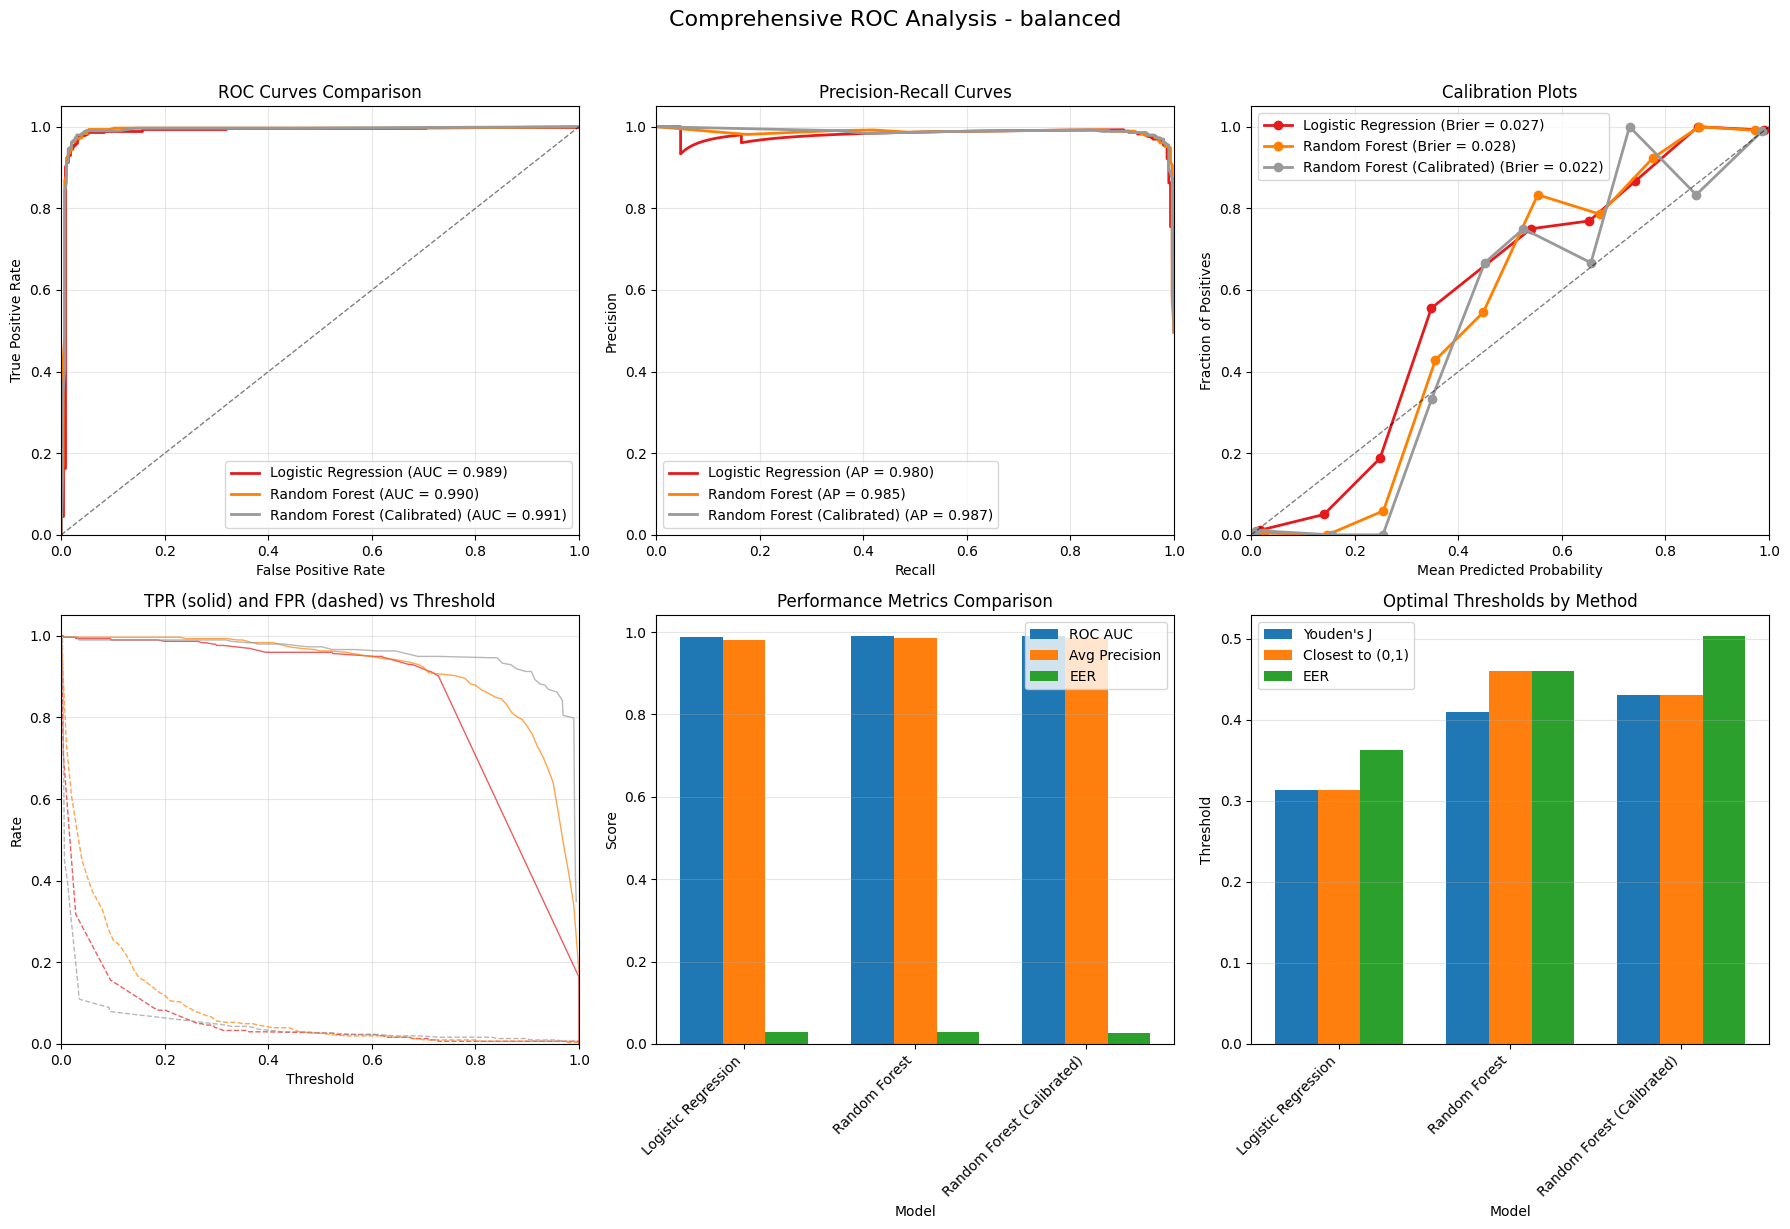

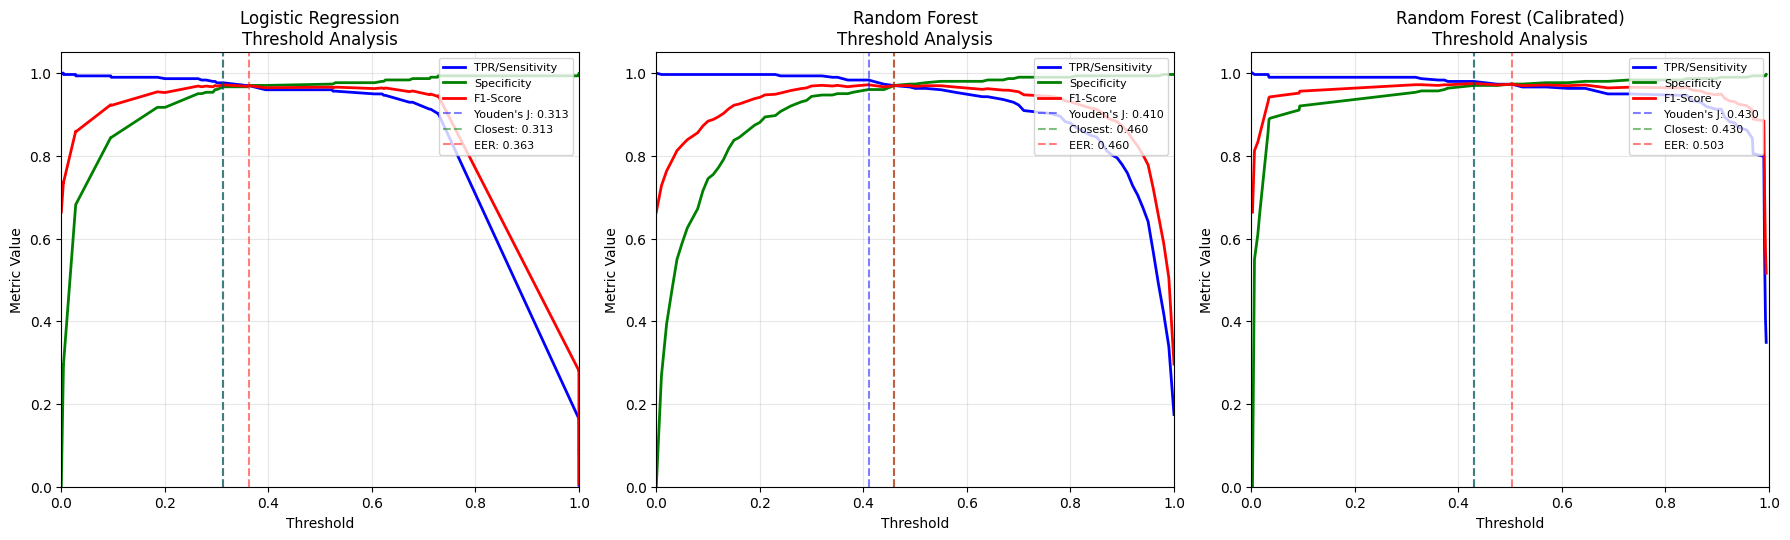


ANALYZING IMBALANCED DATASET
Class distribution: [1326   74]
Test set size: 600
Positive class ratio: 0.052

2. Training models...

3. Performing comprehensive ROC analysis...

4. Model Performance Summary:
------------------------------------------------------------
Model                     ROC AUC    Avg Precision   EER        Brier     
------------------------------------------------------------
Logistic Regression       0.961      0.934           0.014      0.007     
Random Forest             0.975      0.936           0.051      0.012     
Random Forest (Calibrated) 0.970      0.928           0.065      0.009     

5. Optimal Thresholds:
------------------------------------------------------------

Logistic Regression:
  Youden's J: 0.106
  Closest to (0,1): 0.106
  Equal Error Rate: 0.106
  Metrics at Youden's threshold:
    Sensitivity: 0.935
    Specificity: 0.986
    Precision: 0.784
    F1-Score: 0.853

Random Forest:
  Youden's J: 0.090
  Closest to (0,1): 0.090
  Equal 

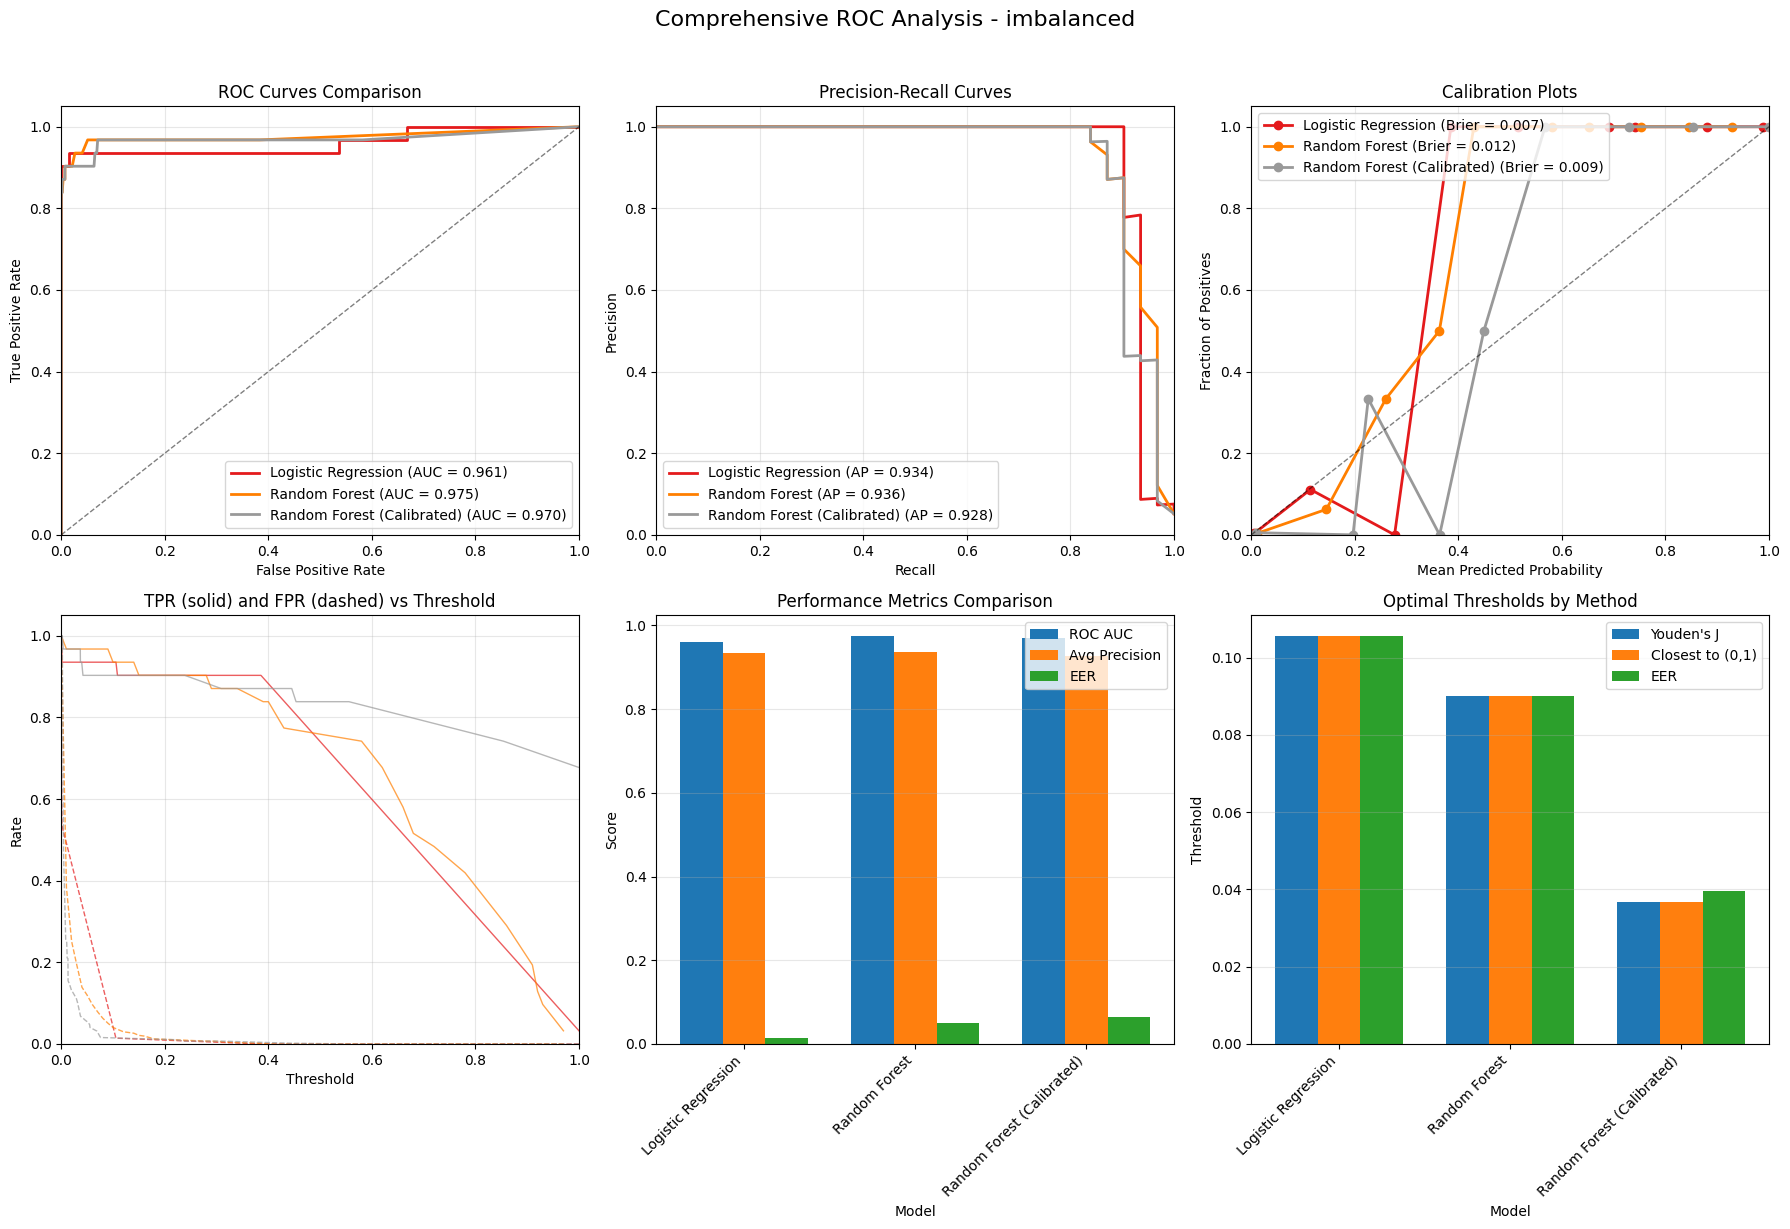

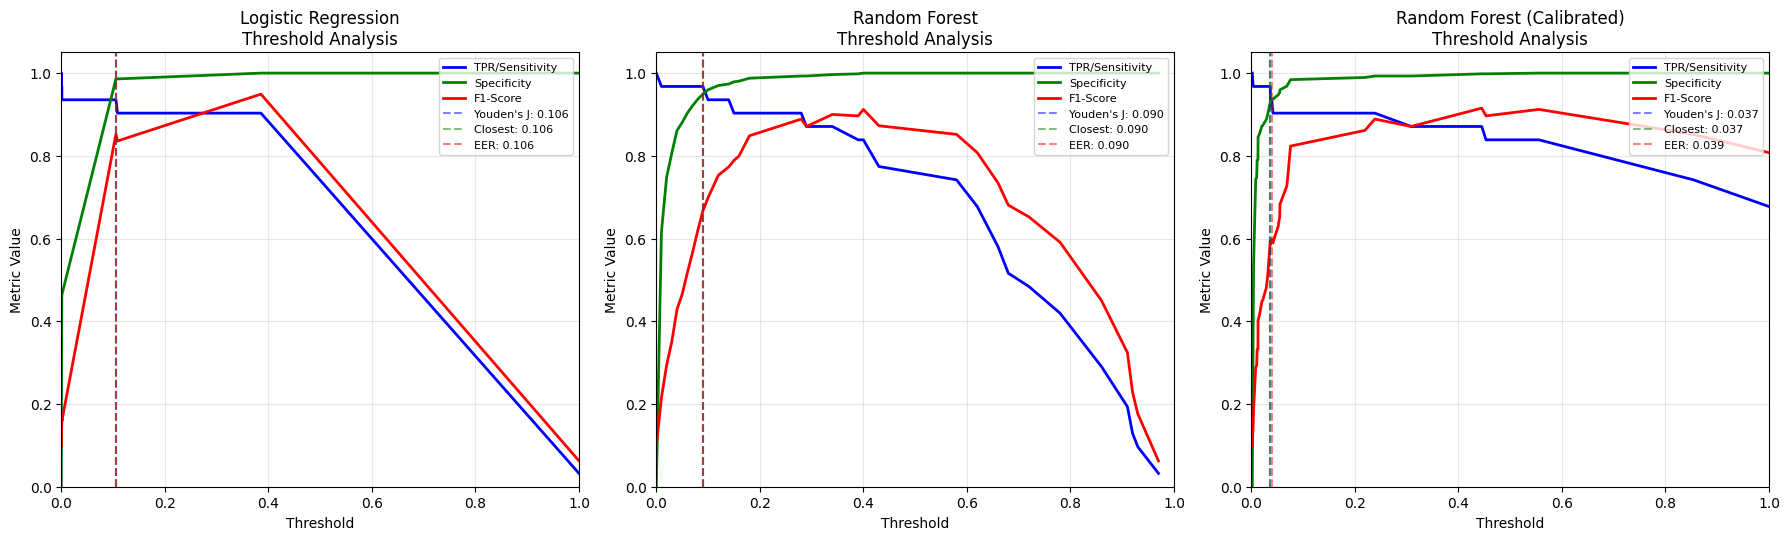


MULTI-CLASS ROC EXAMPLE


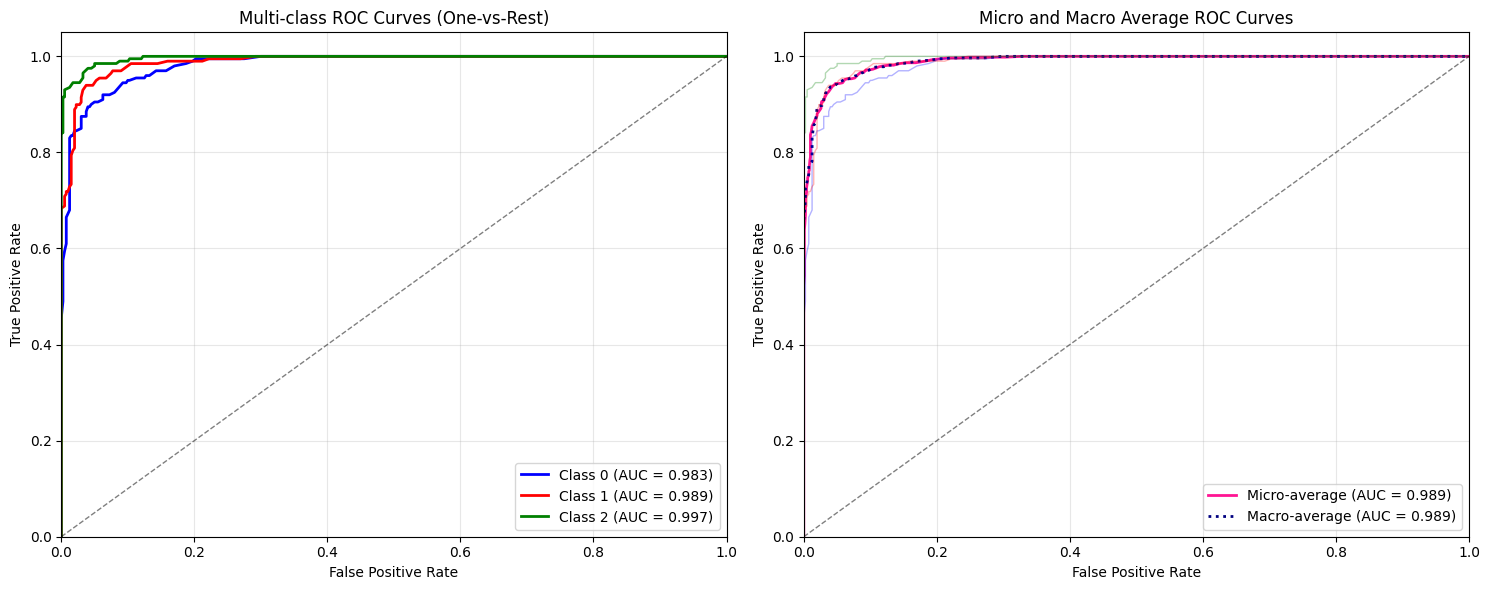


Multi-class ROC AUC scores:
  Class 0: 0.983
  Class 1: 0.989
  Class 2: 0.997
  Micro-average: 0.989
  Macro-average: 0.989

ANALYSIS COMPLETE!

EXAMPLE: PRODUCTION ROC MONITORING

Simulating batch monitoring...
Batch 1: AUC = 1.000, Threshold = 0.410, Degradation = False
Batch 2: AUC = 1.000, Threshold = 0.790, Degradation = False
Batch 3: AUC = 1.000, Threshold = 0.430, Degradation = False
Batch 4: AUC = 1.000, Threshold = 0.320, Degradation = False
Batch 5: AUC = 0.982, Threshold = 0.580, Degradation = False
Batch 6: AUC = 0.998, Threshold = 0.490, Degradation = False
Batch 7: AUC = 1.000, Threshold = 0.420, Degradation = False
Batch 8: AUC = 0.989, Threshold = 0.420, Degradation = False
Batch 9: AUC = 0.978, Threshold = 0.320, Degradation = False
Batch 10: AUC = 1.000, Threshold = 0.350, Degradation = False


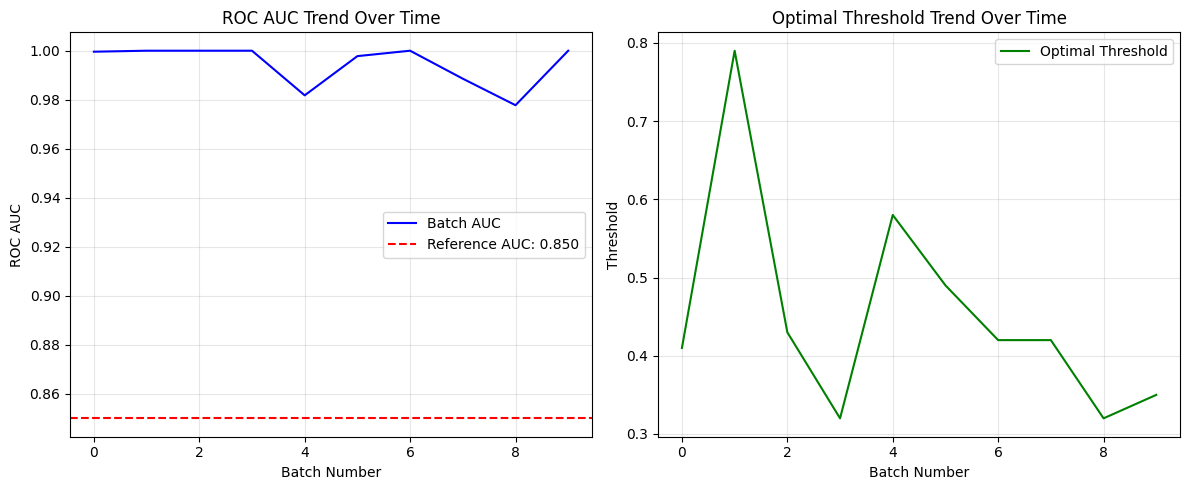


ALL CODE EXECUTED SUCCESSFULLY!
Check generated PNG files for visualizations


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import (roc_curve, auc, roc_auc_score, 
                           precision_recall_curve, average_precision_score,
                           confusion_matrix, classification_report,
                           brier_score_loss, log_loss)
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
from sklearn.preprocessing import label_binarize
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


np.random.seed(42)


# 1. GENERATE SYNTHETIC DATASET WITH DIFFERENT IMBALANCE LEVELS

def generate_datasets():
    """Generate balanced and imbalanced datasets"""
    
    # Balanced dataset
    X_bal, y_bal = make_classification(
        n_samples=2000, n_features=10, n_informative=8,
        n_redundant=2, n_clusters_per_class=1,
        weights=[0.5, 0.5], random_state=42
    )
    
    # Imbalanced dataset (95:5 ratio)
    X_imbal, y_imbal = make_classification(
        n_samples=2000, n_features=10, n_informative=8,
        n_redundant=2, n_clusters_per_class=1,
        weights=[0.95, 0.05], random_state=42
    )
    
    # Split balanced dataset
    X_bal_train, X_bal_test, y_bal_train, y_bal_test = train_test_split(
        X_bal, y_bal, test_size=0.3, random_state=42, stratify=y_bal
    )
    
    # Split imbalanced dataset
    X_imbal_train, X_imbal_test, y_imbal_train, y_imbal_test = train_test_split(
        X_imbal, y_imbal, test_size=0.3, random_state=42, stratify=y_imbal
    )
    
    return {
        'balanced': (X_bal_train, X_bal_test, y_bal_train, y_bal_test),
        'imbalanced': (X_imbal_train, X_imbal_test, y_imbal_train, y_imbal_test)
    }


# 2. MODEL TRAINING FUNCTION

def train_models(X_train, y_train):
    """Train multiple classifiers"""
    
    # Logistic Regression
    lr = LogisticRegression(random_state=42, max_iter=1000)
    lr.fit(X_train, y_train)
    
    # Random Forest (uncalibrated and calibrated)
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    
    # Calibrated Random Forest
    rf_calibrated = CalibratedClassifierCV(rf, method='isotonic', cv=3)
    rf_calibrated.fit(X_train, y_train)
    
    return {
        'Logistic Regression': lr,
        'Random Forest': rf,
        'Random Forest (Calibrated)': rf_calibrated
    }


# 3. COMPREHENSIVE ROC ANALYSIS FUNCTION

def comprehensive_roc_analysis(models, X_test, y_test, dataset_name=""):
    """Perform complete ROC analysis"""
    
    results = {}
    
    for model_name, model in models.items():
        # Get predicted probabilities
        if hasattr(model, "predict_proba"):
            y_pred_proba = model.predict_proba(X_test)[:, 1]
        else:
            y_pred_proba = model.decision_function(X_test)
            y_pred_proba = 1 / (1 + np.exp(-y_pred_proba))  # Convert to probability
            
        y_pred = (y_pred_proba >= 0.5).astype(int)
        
        # Calculate ROC curve and AUC
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        
        # Calculate Precision-Recall curve
        precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
        pr_auc = auc(recall, precision)
        avg_precision = average_precision_score(y_test, y_pred_proba)
        
        # Find optimal thresholds
        # Method 1: Youden's J statistic
        J = tpr - fpr
        optimal_idx_j = np.argmax(J)
        optimal_threshold_j = thresholds[optimal_idx_j]
        
        # Method 2: Closest to (0,1)
        distances = np.sqrt((fpr)**2 + (1 - tpr)**2)
        optimal_idx_dist = np.argmin(distances)
        optimal_threshold_dist = thresholds[optimal_idx_dist]
        
        # Method 3: Equal Error Rate (EER)
        eer_idx = np.argmin(np.abs(fpr - (1 - tpr)))
        eer_threshold = thresholds[eer_idx]
        eer = fpr[eer_idx]  # or (1-tpr[eer_idx])
        
        # Calibration metrics
        prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=10)
        brier = brier_score_loss(y_test, y_pred_proba)
        logloss = log_loss(y_test, y_pred_proba)
        
        # Confusion matrix at optimal threshold (Youden's J)
        y_pred_optimal = (y_pred_proba >= optimal_threshold_j).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred_optimal).ravel()
        
        # Calculate metrics at optimal threshold
        sensitivity_opt = tp / (tp + fn) if (tp + fn) > 0 else 0
        specificity_opt = tn / (tn + fp) if (tn + fp) > 0 else 0
        precision_opt = tp / (tp + fp) if (tp + fp) > 0 else 0
        f1_opt = 2 * (precision_opt * sensitivity_opt) / (precision_opt + sensitivity_opt) if (precision_opt + sensitivity_opt) > 0 else 0
        
        # Store results
        results[model_name] = {
            'fpr': fpr,
            'tpr': tpr,
            'thresholds': thresholds,
            'roc_auc': roc_auc,
            'precision': precision,
            'recall': recall,
            'pr_auc': pr_auc,
            'avg_precision': avg_precision,
            'optimal_thresholds': {
                'youden': optimal_threshold_j,
                'closest': optimal_threshold_dist,
                'eer': eer_threshold
            },
            'metrics_at_youden': {
                'threshold': optimal_threshold_j,
                'sensitivity': sensitivity_opt,
                'specificity': specificity_opt,
                'precision': precision_opt,
                'f1': f1_opt
            },
            'calibration': {
                'prob_true': prob_true,
                'prob_pred': prob_pred,
                'brier': brier,
                'logloss': logloss
            },
            'eer': eer,
            'y_pred_proba': y_pred_proba
        }
    
    return results


# 4. BOOTSTRAP CONFIDENCE INTERVALS FUNCTION

def bootstrap_auc_ci(y_true, y_pred_proba, n_bootstraps=1000, confidence=0.95):
    """Calculate confidence intervals for AUC using bootstrap"""
    
    bootstrapped_scores = []
    n_samples = len(y_true)
    
    for _ in range(n_bootstraps):
        # Sample with replacement
        indices = np.random.choice(n_samples, n_samples, replace=True)
        
        # Check if both classes are present
        if len(np.unique(y_true[indices])) < 2:
            continue
            
        # Calculate AUC
        score = roc_auc_score(y_true[indices], y_pred_proba[indices])
        bootstrapped_scores.append(score)
    
    bootstrapped_scores = np.array(bootstrapped_scores)
    
    # Calculate confidence interval
    alpha = (1 - confidence) / 2
    lower = np.percentile(bootstrapped_scores, 100 * alpha)
    upper = np.percentile(bootstrapped_scores, 100 * (1 - alpha))
    
    return lower, upper, bootstrapped_scores


# 5. PARTIAL AUC FUNCTION

def partial_auc_score(y_true, y_pred_proba, fpr_range=(0, 0.1)):
    """Calculate partial AUC for specific FPR range"""
    
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    
    # Filter for the specified FPR range
    mask = (fpr >= fpr_range[0]) & (fpr <= fpr_range[1])
    fpr_partial = fpr[mask]
    tpr_partial = tpr[mask]
    
    # Add boundary points if needed
    if len(fpr_partial) == 0:
        return 0.0
    
    if fpr_partial[0] > fpr_range[0]:
        # Interpolate at lower bound
        tpr_at_lower = np.interp(fpr_range[0], fpr, tpr)
        fpr_partial = np.insert(fpr_partial, 0, fpr_range[0])
        tpr_partial = np.insert(tpr_partial, 0, tpr_at_lower)
    
    if fpr_partial[-1] < fpr_range[1]:
        # Interpolate at upper bound
        tpr_at_upper = np.interp(fpr_range[1], fpr, tpr)
        fpr_partial = np.append(fpr_partial, fpr_range[1])
        tpr_partial = np.append(tpr_partial, tpr_at_upper)
    
    # Calculate partial AUC
    pAUC = auc(fpr_partial, tpr_partial)
    
    # Normalize by FPR range width
    normalized_pAUC = pAUC / (fpr_range[1] - fpr_range[0])
    
    return normalized_pAUC


# 6. VISUALIZATION FUNCTIONS
def plot_comprehensive_roc_curves(results, dataset_name=""):
    """Plot multiple ROC curves with confidence intervals"""
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle(f'Comprehensive ROC Analysis - {dataset_name}', fontsize=16, y=1.02)
    
    # Plot 1: ROC Curves Comparison
    ax1 = axes[0, 0]
    colors = plt.cm.Set1(np.linspace(0, 1, len(results)))
    
    for (model_name, result), color in zip(results.items(), colors):
        ax1.plot(result['fpr'], result['tpr'], color=color, lw=2,
                label=f'{model_name} (AUC = {result["roc_auc"]:.3f})')
    
    ax1.plot([0, 1], [0, 1], 'k--', lw=1, alpha=0.5)
    ax1.set_xlim([0.0, 1.0])
    ax1.set_ylim([0.0, 1.05])
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title('ROC Curves Comparison')
    ax1.legend(loc="lower right")
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Precision-Recall Curves
    ax2 = axes[0, 1]
    for (model_name, result), color in zip(results.items(), colors):
        ax2.plot(result['recall'], result['precision'], color=color, lw=2,
                label=f'{model_name} (AP = {result["avg_precision"]:.3f})')
    
    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_xlabel('Recall')
    ax2.set_ylabel('Precision')
    ax2.set_title('Precision-Recall Curves')
    ax2.legend(loc="lower left")
    ax2.grid(True, alpha=0.3)
    
    # Plot 3: Calibration Plots
    ax3 = axes[0, 2]
    for (model_name, result), color in zip(results.items(), colors):
        ax3.plot(result['calibration']['prob_pred'], 
                result['calibration']['prob_true'], 
                marker='o', color=color, lw=2,
                label=f'{model_name} (Brier = {result["calibration"]["brier"]:.3f})')
    
    ax3.plot([0, 1], [0, 1], 'k--', lw=1, alpha=0.5)
    ax3.set_xlim([0.0, 1.0])
    ax3.set_ylim([0.0, 1.05])
    ax3.set_xlabel('Mean Predicted Probability')
    ax3.set_ylabel('Fraction of Positives')
    ax3.set_title('Calibration Plots')
    ax3.legend(loc="upper left")
    ax3.grid(True, alpha=0.3)
    
    # Plot 4: Threshold Analysis
    ax4 = axes[1, 0]
    for (model_name, result), color in zip(results.items(), colors):
        thresholds = result['thresholds']
        # Use only thresholds that are finite
        valid_idx = np.isfinite(thresholds)
        thresholds_valid = thresholds[valid_idx]
        
        if len(thresholds_valid) > 0:
            tpr_valid = result['tpr'][valid_idx]
            fpr_valid = result['fpr'][valid_idx]
            
            # Plot TPR and FPR vs Threshold
            ax4.plot(thresholds_valid, tpr_valid, color=color, lw=1, alpha=0.7, linestyle='-')
            ax4.plot(thresholds_valid, fpr_valid, color=color, lw=1, alpha=0.7, linestyle='--')
    
    ax4.set_xlabel('Threshold')
    ax4.set_ylabel('Rate')
    ax4.set_title('TPR (solid) and FPR (dashed) vs Threshold')
    ax4.set_xlim([0.0, 1.0])
    ax4.set_ylim([0.0, 1.05])
    ax4.grid(True, alpha=0.3)
    
    # Plot 5: Performance Metrics Comparison
    ax5 = axes[1, 1]
    model_names = list(results.keys())
    metrics = ['roc_auc', 'avg_precision', 'eer']
    metric_labels = ['ROC AUC', 'Avg Precision', 'EER']
    
    x = np.arange(len(model_names))
    width = 0.25
    
    for i, (metric, label) in enumerate(zip(metrics, metric_labels)):
        values = [results[model][metric] if metric != 'eer' else results[model][metric] 
                 for model in model_names]
        ax5.bar(x + i*width, values, width, label=label)
    
    ax5.set_xlabel('Model')
    ax5.set_ylabel('Score')
    ax5.set_title('Performance Metrics Comparison')
    ax5.set_xticks(x + width)
    ax5.set_xticklabels(model_names, rotation=45, ha='right')
    ax5.legend()
    ax5.grid(True, alpha=0.3, axis='y')
    
    # Plot 6: Optimal Threshold Comparison
    ax6 = axes[1, 2]
    threshold_methods = ['youden', 'closest', 'eer']
    threshold_labels = ["Youden's J", "Closest to (0,1)", "EER"]
    
    for i, (method, label) in enumerate(zip(threshold_methods, threshold_labels)):
        values = [results[model]['optimal_thresholds'][method] for model in model_names]
        ax6.bar(x + i*width, values, width, label=label)
    
    ax6.set_xlabel('Model')
    ax6.set_ylabel('Threshold')
    ax6.set_title('Optimal Thresholds by Method')
    ax6.set_xticks(x + width)
    ax6.set_xticklabels(model_names, rotation=45, ha='right')
    ax6.legend()
    ax6.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    return fig

def plot_threshold_analysis(results, X_test, y_test):
    """Detailed threshold analysis visualization"""
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    
    for idx, (model_name, result) in enumerate(results.items()):
        row = idx // 3
        col = idx % 3
        
        ax = axes[row, col]
        
        # Get thresholds and metrics
        thresholds = result['thresholds']
        fpr = result['fpr']
        tpr = result['tpr']
        precision = result['precision']
        recall = result['recall']
        
        # Calculate F1-score for each threshold
        f1_scores = []
        for threshold in thresholds:
            if np.isfinite(threshold):
                y_pred = (result['y_pred_proba'] >= threshold).astype(int)
                tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
                prec = tp / (tp + fp) if (tp + fp) > 0 else 0
                rec = tp / (tp + fn) if (tp + fn) > 0 else 0
                f1 = 2 * (prec * rec) / (prec + rec) if (prec + rec) > 0 else 0
                f1_scores.append(f1)
            else:
                f1_scores.append(0)
        
        f1_scores = np.array(f1_scores)
        
        # Plot metrics vs threshold
        valid_idx = np.isfinite(thresholds)
        thresholds_valid = thresholds[valid_idx]
        
        if len(thresholds_valid) > 0:
            ax.plot(thresholds_valid, tpr[valid_idx], 'b-', label='TPR/Sensitivity', lw=2)
            ax.plot(thresholds_valid, 1 - fpr[valid_idx], 'g-', label='Specificity', lw=2)
            ax.plot(thresholds_valid, f1_scores[valid_idx], 'r-', label='F1-Score', lw=2)
            
            # Mark optimal thresholds
            optimal_thresholds = result['optimal_thresholds']
            
            # Youden's J
            ax.axvline(x=optimal_thresholds['youden'], color='b', linestyle='--', 
                      alpha=0.5, label=f"Youden's J: {optimal_thresholds['youden']:.3f}")
            
            # Closest to (0,1)
            ax.axvline(x=optimal_thresholds['closest'], color='g', linestyle='--',
                      alpha=0.5, label=f"Closest: {optimal_thresholds['closest']:.3f}")
            
            # EER
            ax.axvline(x=optimal_thresholds['eer'], color='r', linestyle='--',
                      alpha=0.5, label=f"EER: {optimal_thresholds['eer']:.3f}")
        
        ax.set_xlabel('Threshold')
        ax.set_ylabel('Metric Value')
        ax.set_title(f'{model_name}\nThreshold Analysis')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.legend(loc='upper right', fontsize=8)
        ax.grid(True, alpha=0.3)
    
    # Remove empty subplots if any
    for idx in range(len(results), 6):
        row = idx // 3
        col = idx % 3
        axes[row, col].set_visible(False)
    
    plt.tight_layout()
    return fig


# 7. MULTI-CLASS ROC EXAMPLE

def multi_class_roc_example():
    """Example of ROC curves for multi-class classification"""
    
    # Generate multi-class data
    X_multi, y_multi = make_classification(
        n_samples=2000, n_features=10, n_informative=8,
        n_classes=3, n_clusters_per_class=1, random_state=42
    )
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_multi, y_multi, test_size=0.3, random_state=42, stratify=y_multi
    )
    
    # Train model
    rf_multi = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_multi.fit(X_train, y_train)
    
    # Get predicted probabilities
    y_pred_proba = rf_multi.predict_proba(X_test)
    
    # Binarize labels for ROC calculation
    y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
    n_classes = y_test_bin.shape[1]
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_proba.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    # Compute macro-average ROC curve and ROC area
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    
    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    # Plot multi-class ROC
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot individual classes
    colors = ['blue', 'red', 'green']
    ax1 = axes[0]
    
    for i, color in zip(range(n_classes), colors):
        ax1.plot(fpr[i], tpr[i], color=color, lw=2,
                label=f'Class {i} (AUC = {roc_auc[i]:.3f})')
    
    ax1.plot([0, 1], [0, 1], 'k--', lw=1, alpha=0.5)
    ax1.set_xlim([0.0, 1.0])
    ax1.set_ylim([0.0, 1.05])
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title('Multi-class ROC Curves (One-vs-Rest)')
    ax1.legend(loc="lower right")
    ax1.grid(True, alpha=0.3)
    
    # Plot macro and micro averages
    ax2 = axes[1]
    ax2.plot(fpr["micro"], tpr["micro"], color='deeppink', lw=2,
            label=f'Micro-average (AUC = {roc_auc["micro"]:.3f})')
    ax2.plot(fpr["macro"], tpr["macro"], color='navy', lw=2, linestyle=':',
            label=f'Macro-average (AUC = {roc_auc["macro"]:.3f})')
    
    for i, color in zip(range(n_classes), colors):
        ax2.plot(fpr[i], tpr[i], color=color, lw=1, alpha=0.3)
    
    ax2.plot([0, 1], [0, 1], 'k--', lw=1, alpha=0.5)
    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('Micro and Macro Average ROC Curves')
    ax2.legend(loc="lower right")
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return {
        'fpr': fpr,
        'tpr': tpr,
        'roc_auc': roc_auc,
        'model': rf_multi,
        'X_test': X_test,
        'y_test': y_test,
        'y_pred_proba': y_pred_proba
    }


# 8. MAIN EXECUTION FUNCTION

def main():
    """Main function to run complete ROC analysis"""
    
    print("=" * 70)
    print("COMPREHENSIVE ROC CURVE ANALYSIS")
    print("From Basics to Advanced Implementation")
    print("=" * 70)
    
    # Generate datasets
    print("\n1. Generating datasets...")
    datasets = generate_datasets()
    
    # Analyze each dataset
    for dataset_name, (X_train, X_test, y_train, y_test) in datasets.items():
        print(f"\n{'='*60}")
        print(f"ANALYZING {dataset_name.upper()} DATASET")
        print(f"Class distribution: {np.bincount(y_train)}")
        print(f"Test set size: {len(y_test)}")
        print(f"Positive class ratio: {y_test.mean():.3f}")
        
        # Train models
        print("\n2. Training models...")
        models = train_models(X_train, y_train)
        
        # Comprehensive ROC analysis
        print("\n3. Performing comprehensive ROC analysis...")
        results = comprehensive_roc_analysis(models, X_test, y_test, dataset_name)
        
        # Display summary statistics
        print("\n4. Model Performance Summary:")
        print("-" * 60)
        print(f"{'Model':<25} {'ROC AUC':<10} {'Avg Precision':<15} {'EER':<10} {'Brier':<10}")
        print("-" * 60)
        
        for model_name, result in results.items():
            print(f"{model_name:<25} {result['roc_auc']:<10.3f} "
                  f"{result['avg_precision']:<15.3f} "
                  f"{result['eer']:<10.3f} "
                  f"{result['calibration']['brier']:<10.3f}")
        
        # Display optimal thresholds
        print("\n5. Optimal Thresholds:")
        print("-" * 60)
        for model_name, result in results.items():
            print(f"\n{model_name}:")
            print(f"  Youden's J: {result['optimal_thresholds']['youden']:.3f}")
            print(f"  Closest to (0,1): {result['optimal_thresholds']['closest']:.3f}")
            print(f"  Equal Error Rate: {result['optimal_thresholds']['eer']:.3f}")
            
            metrics = result['metrics_at_youden']
            print(f"  Metrics at Youden's threshold:")
            print(f"    Sensitivity: {metrics['sensitivity']:.3f}")
            print(f"    Specificity: {metrics['specificity']:.3f}")
            print(f"    Precision: {metrics['precision']:.3f}")
            print(f"    F1-Score: {metrics['f1']:.3f}")
        
        # Bootstrap confidence intervals for best model
        print("\n6. Bootstrap Confidence Intervals:")
        print("-" * 60)
        
        # Find best model by ROC AUC
        best_model_name = max(results.items(), key=lambda x: x[1]['roc_auc'])[0]
        best_result = results[best_model_name]
        
        ci_lower, ci_upper, boot_scores = bootstrap_auc_ci(
            y_test, best_result['y_pred_proba'], n_bootstraps=500
        )
        
        print(f"Best model: {best_model_name}")
        print(f"ROC AUC: {best_result['roc_auc']:.3f}")
        print(f"95% Confidence Interval: ({ci_lower:.3f}, {ci_upper:.3f})")
        print(f"Bootstrap mean: {boot_scores.mean():.3f}")
        print(f"Bootstrap std: {boot_scores.std():.3f}")
        
        # Partial AUC calculation
        print("\n7. Partial AUC Analysis:")
        print("-" * 60)
        
        pAUC_ranges = [(0, 0.1), (0, 0.2), (0.8, 1.0)]
        
        for fpr_range in pAUC_ranges:
            pAUC = partial_auc_score(y_test, best_result['y_pred_proba'], fpr_range)
            print(f"pAUC for FPR range {fpr_range}: {pAUC:.3f}")
        
        # Create visualizations
        print("\n8. Generating visualizations...")
        
        # Comprehensive ROC curves
        fig1 = plot_comprehensive_roc_curves(results, dataset_name)
        fig1.savefig(f'roc_comprehensive_{dataset_name}.png', dpi=150, bbox_inches='tight')
        
        # Threshold analysis
        fig2 = plot_threshold_analysis(results, X_test, y_test)
        fig2.savefig(f'threshold_analysis_{dataset_name}.png', dpi=150, bbox_inches='tight')
        
        # Show plots
        plt.show()
    
    # Multi-class ROC example
    print("\n" + "="*60)
    print("MULTI-CLASS ROC EXAMPLE")
    print("="*60)
    
    multi_class_results = multi_class_roc_example()
    
    print("\nMulti-class ROC AUC scores:")
    for i in range(3):
        print(f"  Class {i}: {multi_class_results['roc_auc'][i]:.3f}")
    print(f"  Micro-average: {multi_class_results['roc_auc']['micro']:.3f}")
    print(f"  Macro-average: {multi_class_results['roc_auc']['macro']:.3f}")
    
    print("\n" + "="*70)
    print("ANALYSIS COMPLETE!")
    print("="*70)
    
    # Return results for further analysis if needed
    return {
        'datasets': datasets,
        'results': results if 'results' in locals() else None,
        'multi_class_results': multi_class_results
    }


# 9. BONUS: PRODUCTION-READY ROC MONITORING CLASS

class ROCMonitor:
    """Class for monitoring ROC performance in production"""
    
    def __init__(self, model, reference_auc=None, window_size=1000):
        self.model = model
        self.reference_auc = reference_auc
        self.window_size = window_size
        self.performance_history = []
        self.auc_history = []
        self.threshold_history = []
        
    def update(self, X_batch, y_batch):
        """Update monitor with new batch of data"""
        
        # Get predictions
        y_pred_proba = self.model.predict_proba(X_batch)[:, 1]
        
        # Calculate ROC AUC
        batch_auc = roc_auc_score(y_batch, y_pred_proba)
        
        # Calculate optimal threshold (Youden's J)
        fpr, tpr, thresholds = roc_curve(y_batch, y_pred_proba)
        J = tpr - fpr
        optimal_idx = np.argmax(J)
        optimal_threshold = thresholds[optimal_idx]
        
        # Store metrics
        self.auc_history.append(batch_auc)
        self.threshold_history.append(optimal_threshold)
        
        # Check for performance degradation
        degradation_detected = False
        if self.reference_auc is not None:
            if batch_auc < self.reference_auc * 0.95:  # 5% degradation
                degradation_detected = True
        
        metrics = {
            'batch_auc': batch_auc,
            'optimal_threshold': optimal_threshold,
            'degradation_detected': degradation_detected,
            'timestamp': pd.Timestamp.now()
        }
        
        self.performance_history.append(metrics)
        
        # Keep only last window_size entries
        if len(self.performance_history) > self.window_size:
            self.performance_history = self.performance_history[-self.window_size:]
            self.auc_history = self.auc_history[-self.window_size:]
            self.threshold_history = self.threshold_history[-self.window_size:]
        
        return metrics
    
    def plot_performance_trend(self):
        """Plot performance trend over time"""
        
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        
        # Plot AUC trend
        ax1 = axes[0]
        ax1.plot(self.auc_history, 'b-', label='Batch AUC')
        if self.reference_auc is not None:
            ax1.axhline(y=self.reference_auc, color='r', linestyle='--', 
                       label=f'Reference AUC: {self.reference_auc:.3f}')
        ax1.set_xlabel('Batch Number')
        ax1.set_ylabel('ROC AUC')
        ax1.set_title('ROC AUC Trend Over Time')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Plot threshold trend
        ax2 = axes[1]
        ax2.plot(self.threshold_history, 'g-', label='Optimal Threshold')
        ax2.set_xlabel('Batch Number')
        ax2.set_ylabel('Threshold')
        ax2.set_title('Optimal Threshold Trend Over Time')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        return fig


# 10. EXAMPLE USAGE

if __name__ == "__main__":
    # Run the complete analysis
    analysis_results = main()
    
    # Example of using the ROCMonitor class
    print("\n" + "="*60)
    print("EXAMPLE: PRODUCTION ROC MONITORING")
    print("="*60)
    
    # Get a trained model from our analysis
    X_train, X_test, y_train, y_test = analysis_results['datasets']['balanced']
    model = train_models(X_train, y_train)['Random Forest']
    
    # Create monitor
    monitor = ROCMonitor(model, reference_auc=0.85, window_size=50)
    
    # Simulate batch updates
    print("\nSimulating batch monitoring...")
    n_batches = 10
    batch_size = 100
    
    for i in range(n_batches):
        # Create synthetic batch (in reality, this would be new incoming data)
        batch_indices = np.random.choice(len(X_test), batch_size, replace=False)
        X_batch = X_test[batch_indices]
        y_batch = y_test[batch_indices]
        
        # Update monitor
        metrics = monitor.update(X_batch, y_batch)
        
        print(f"Batch {i+1}: AUC = {metrics['batch_auc']:.3f}, "
              f"Threshold = {metrics['optimal_threshold']:.3f}, "
              f"Degradation = {metrics['degradation_detected']}")
    
    # Plot performance trend
    monitor.plot_performance_trend()
    
    print("\n" + "="*70)
    print("ALL CODE EXECUTED SUCCESSFULLY!")
    print("Check generated PNG files for visualizations")
    print("="*70)